# Importing Data - API (US CPI data)
Source: https://www.alphavantage.co/ Inflation

In [1]:
#This API returns the annual inflation rates (consumer prices) of the United States via API
#The data is in the shape of a dictionary with keys for the column names and values showing the values in that column

import requests

url = 'https://www.alphavantage.co/query?function=INFLATION&apikey=MJJULQ2LBSJJVTWV'
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Inflation - US Consumer Prices', 'interval': 'annual', 'unit': 'percent', 'data': [{'date': '2021-01-01', 'value': '4.69785886363739'}, {'date': '2020-01-01', 'value': '1.23358439630637'}, {'date': '2019-01-01', 'value': '1.81221007526015'}, {'date': '2018-01-01', 'value': '2.44258329692818'}, {'date': '2017-01-01', 'value': '2.13011000365963'}, {'date': '2016-01-01', 'value': '1.26158320570537'}, {'date': '2015-01-01', 'value': '0.118627135552435'}, {'date': '2014-01-01', 'value': '1.62222297740821'}, {'date': '2013-01-01', 'value': '1.46483265562714'}, {'date': '2012-01-01', 'value': '2.06933726526059'}, {'date': '2011-01-01', 'value': '3.15684156862206'}, {'date': '2010-01-01', 'value': '1.64004344238989'}, {'date': '2009-01-01', 'value': '-0.35554626629975'}, {'date': '2008-01-01', 'value': '3.83910029665101'}, {'date': '2007-01-01', 'value': '2.85267248150136'}, {'date': '2006-01-01', 'value': '3.22594410070407'}, {'date': '2005-01-01', 'value': '3.39274684549547'}, {'da

In [5]:
#view the keys of the dictionary retrived from the API

data.keys() 

dict_keys(['name', 'interval', 'unit', 'data'])

In [6]:
#import pandas and convert the dictionary to a dataframe

import pandas as pd
df = data['data'] 
df = pd.DataFrame(df)
df

,date,value
0,2021-01-01,4.69785886363739
1,2020-01-01,1.23358439630637
2,2019-01-01,1.81221007526015
3,2018-01-01,2.44258329692818
4,2017-01-01,2.13011000365963
...,...,...
57,1964-01-01,1.27891156462583
58,1963-01-01,1.2396694214876
59,1962-01-01,1.19877334820185
60,1961-01-01,1.07072414764723


In [7]:
#view the top 5 rows of the dataframe

print(df.head())

         date             value
0  2021-01-01  4.69785886363739
1  2020-01-01  1.23358439630637
2  2019-01-01  1.81221007526015
3  2018-01-01  2.44258329692818
4  2017-01-01  2.13011000365963


In [8]:
#look at the description of the data in the dataframe created

print(df.describe())

              date             value
count           62                62
unique          62                62
top     2021-01-01  4.69785886363739
freq             1                 1


In [9]:
#look at the summary of the data in the dataframe and check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   value   62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [10]:
#convert the datatypes for both columns from object to float and date

df['value']=df['value'].astype(float)
df['date']= pd.to_datetime(df['date'])

In [11]:
#check the datatypes have been converted and what each column is

df.dtypes

date     datetime64[ns]
value           float64
dtype: object

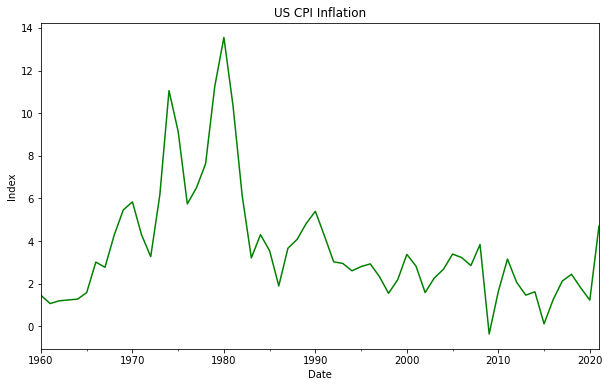

In [12]:
#create a graph of the data

import matplotlib.pyplot as plt
df.plot(x = 'date', y = 'value', kind = 'line', color= 'g',figsize = (10,6),legend=False)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('US CPI Inflation')
plt.show()

In [13]:
#import re
#find the number of years of data in the df
#use regex to return the years from the calculation of the max date less the min date divided by days

import re
years = re.findall(r'\d{2}\s',str((df['date'].max() - df['date'].min())/365.25))

In [14]:
#print out the number of years
#first need to convert the list to a string and add on years to the number

print(years[0], 'years')      

61  years


# Importing Data - csv files (Bitcoin prices for June and July)

In [15]:
#import pandas and import a csv file with Bitcoin prices for June 2022

import pandas as pd
df1 = pd.read_csv('June22 daily BTC.csv')
df1.shape

(30, 7)

In [16]:
#import another csv file with Bitcoin prices for July 2022

df2 = pd.read_csv('July22 daily BTC.csv')
df2.shape

(31, 7)

In [17]:
#view the top 5 rows of the June data imported

df1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211


In [18]:
#view the last 5 rows of data from the July data imported

df2.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
26,27/07/2022,22986.52930,21070.80664,21244.16992,22930.54883,31758955233,22930.54883
27,28/07/2022,24110.47070,22722.26563,22933.64063,23843.88672,40212386158,23843.88672
28,29/07/2022,24294.78711,23481.17383,23845.21289,23804.63281,35887249746,23804.63281
29,30/07/2022,24572.58008,23580.50781,23796.81836,23656.20703,28148218301,23656.20703
30,31/07/2022,24121.64258,23275.70313,23652.07031,23336.89648,23553591896,23336.89648


# Join the June and July datasets into one dataframe called Prices

In [19]:
#join the two months datasets into one dataframe

dfJune = pd.DataFrame(df1)
dfJuly = pd.DataFrame(df2)
Prices = pd.concat([dfJune, dfJuly],axis = 0)

In [20]:
#view the newly created Dataframe of prices for June and July

print(Prices)

          Date         High          Low        Open         Close  \
0   01/06/2022  31957.28516  29501.58789  31792.55469  29799.08008   
1   02/06/2022  30604.73438  29652.70508  29794.89063  30467.48828   
2   03/06/2022  30633.03516  29375.68945  30467.80664  29704.39063   
3   04/06/2022  29930.56445  29500.00586  29706.13867  29832.91406   
4   05/06/2022  30117.74414  29574.44922  29835.11719  29906.66211   
..         ...          ...          ...          ...          ...   
26  27/07/2022  22986.52930  21070.80664  21244.16992  22930.54883   
27  28/07/2022  24110.47070  22722.26563  22933.64063  23843.88672   
28  29/07/2022  24294.78711  23481.17383  23845.21289  23804.63281   
29  30/07/2022  24572.58008  23580.50781  23796.81836  23656.20703   
30  31/07/2022  24121.64258  23275.70313  23652.07031  23336.89648   

         Volume    Adj Close  
0   41135817341  29799.08008  
1   29083562061  30467.48828  
2   26175547452  29704.39063  
3   16588370958  29832.91406  
4   

In [21]:
#check that the new Prices dataset is of a DataFrame type

isinstance(Prices,pd.DataFrame)

True

In [22]:
#look at the description and statistics of the data of all columns in the dataframe created

Prices.describe()

,High,Low,Open,Close,Volume,Adj Close
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01,58.000000
mean,23594.063686,22332.692816,23076.506212,22938.154650,3.035281e+10,22924.591562
std,3743.076603,3677.299782,3805.146182,3633.064549,9.888942e+09,3551.673428
min,19371.748050,17708.623050,19010.902340,19017.642580,1.639082e+10,19242.255860
25%,20913.322270,19937.791020,20547.814450,20548.246090,2.415025e+10,20557.433590
50%,21877.138670,20781.912110,21496.494140,21502.337890,2.862467e+10,21547.272460
75%,24196.818360,23009.949220,23652.070310,23389.433590,3.363101e+10,23376.299312
max,31957.285160,30020.265630,31792.554690,31370.671880,6.820456e+10,31370.671880


# Check for any missing values (9, 17 and 18 June have NaN Adj Close)

In [23]:
#look at the information for the columns in the Prices dataframe
#see that there are 61 records, but only 58 records for the Adj Close column
Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       61 non-null     object 
 1   High       61 non-null     float64
 2   Low        61 non-null     float64
 3   Open       61 non-null     float64
 4   Close      61 non-null     float64
 5   Volume     61 non-null     int64  
 6   Adj Close  58 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.8+ KB


In [24]:
#another way to check for missing data is as follows
#you can see that there are 3 values missing in the Adj Close column

Prices.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    3
dtype: int64

# Filling the blanks (NaN values) with the mean of the Adj Close column

In [25]:
#We can fill in the missing values by a variety of different methods
#In this project I will fill those missing values with the mean of the Adj Close column

Prices['Adj Close'] = Prices['Adj Close'].fillna(Prices['Adj Close'].mean())

# #Passing in a list of the 3 rows which had blanks

In [26]:
#check the rows that had missing values to see that they all have the mean populated for Adj Close on those dates
#this value matches the mean shown in prices.describe above

Prices.iloc[[8,16,17]]

,Date,High,Low,Open,Close,Volume,Adj Close
8,09/06/2022,30609.31055,30020.26563,30215.27930,30111.99805,21692004719,22924.591562
16,17/06/2022,21243.31250,20326.51953,20385.71875,20471.48242,27132421514,22924.591562
17,18/06/2022,20736.04102,17708.62305,20473.42578,19017.64258,42009436760,22924.591562


In [27]:
#view the prices dataframe

print(Prices)

          Date         High          Low        Open         Close  \
0   01/06/2022  31957.28516  29501.58789  31792.55469  29799.08008   
1   02/06/2022  30604.73438  29652.70508  29794.89063  30467.48828   
2   03/06/2022  30633.03516  29375.68945  30467.80664  29704.39063   
3   04/06/2022  29930.56445  29500.00586  29706.13867  29832.91406   
4   05/06/2022  30117.74414  29574.44922  29835.11719  29906.66211   
..         ...          ...          ...          ...          ...   
26  27/07/2022  22986.52930  21070.80664  21244.16992  22930.54883   
27  28/07/2022  24110.47070  22722.26563  22933.64063  23843.88672   
28  29/07/2022  24294.78711  23481.17383  23845.21289  23804.63281   
29  30/07/2022  24572.58008  23580.50781  23796.81836  23656.20703   
30  31/07/2022  24121.64258  23275.70313  23652.07031  23336.89648   

         Volume    Adj Close  
0   41135817341  29799.08008  
1   29083562061  30467.48828  
2   26175547452  29704.39063  
3   16588370958  29832.91406  
4   

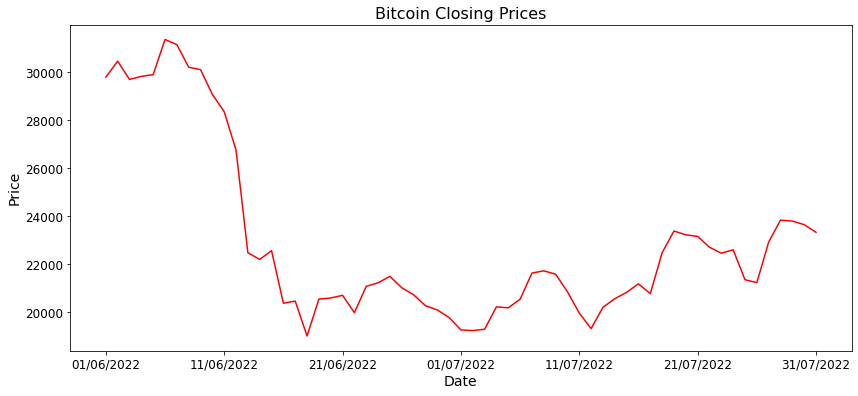

In [28]:
#import matplotlib
#plot a line graph of the Close prices of Bitcoin for June and July

import matplotlib.pyplot as plt
Prices.plot(x = 'Date', y = 'Close', kind = 'line', figsize = (14,6),legend=False, color = 'r', fontsize = 12)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Bitcoin Closing Prices', fontsize = 16)
plt.show()

<AxesSubplot:title={'center':'Bitcoin Price Distribution'}, xlabel='Price Type', ylabel='Price'>

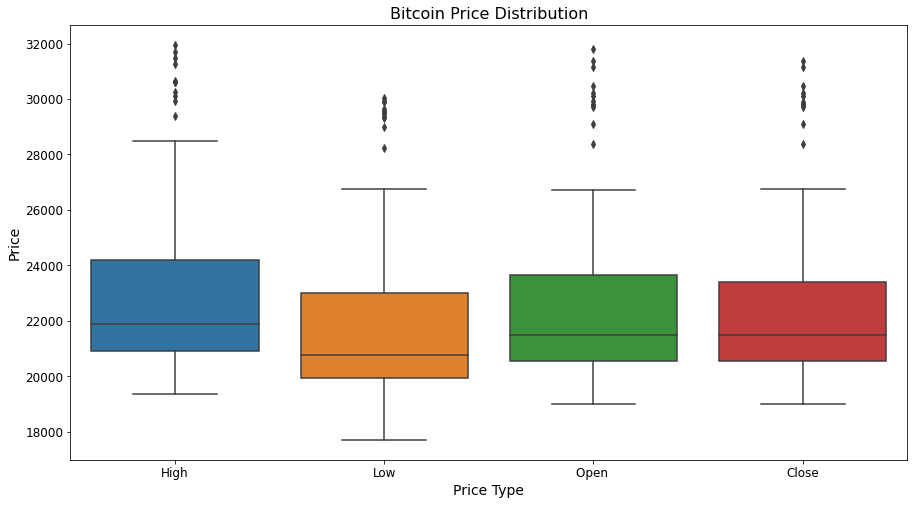

In [32]:
#import Seaborn
#plot a boxplot chart of four of the Bitcoin prices

import seaborn as sns

Pricing_df = Prices.drop(['Volume','Adj Close'], axis=1)

plt.figure(figsize=(15, 8))
plt.xlabel('Price Type', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Bitcoin Price Distribution', fontsize = 16)
sns.boxplot(data=Pricing_df)

# Define a custom function to create resusable code

In [33]:
#Create a function 
#Assign the function with inputs to a variable
#Create a new column in the dataframe and assign the variable to it
#This function is used in the machine learning section below

import numpy as np
import pandas as pd

def DayVar(a,b):
    """This function will calculate the variance between two kinds of price for a day.
        Example: the difference between Low and High price each day.
    
    Args: 
        arg_1(float): The first kind of price you want to compare eg. Low Price.
        arg_2(float): The second kind of price you want to compare to first price to eg. High Price.
        
    Returns:
        Float: A value of the difference between the two Prices.
        
    Raises:
        ValueError: None expected, unless there is a non-numeric value in one of the columns and no value can be calculated.
        
    Notes:
        This is my first function :)
        """
    return (b - a)

d = DayVar(Prices['Low'],Prices['High'])
Prices['PriceDiff'] = d

In [34]:
#Create a function 
#Assign the function with its input to a variable
#Create a new column in the dataframe and assign the variable to it

def DayChg(c):
    """This function will calculate the daily change of a specified price.
        Example: the change in the Closing price over the past day.
    
    Args: 
        arg_1(float): The price you want to see the daily % change for.
        
    Returns:
        Float: A percentage value of the change in the assigned price over the past day.
        
    Raises:
        ValueError: None expected, unless there is a non-numeric value in one of the columns and no value can be calculated.
        
    Notes:
        This is my second function :)
        """
    return (c.pct_change() * 100)

d = DayChg(Prices['Close'])
Prices['DayChg(%)'] = d

In [35]:
#check the new functions in the new columns were created
#Price Diff and DayChg(%) are the new columns

Prices.head()

,Date,High,Low,Open,Close,Volume,Adj Close,PriceDiff,DayChg(%)
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008,2455.69727,NaN
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828,952.02930,2.243050
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063,1257.34571,-2.504629
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406,430.55859,0.432675
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211,543.29492,0.247204


In [36]:
#reuse the created function
#assign it to a new variable
#create a new column in the Prices dataframe and assign the variable to it

e = DayChg(Prices['Volume'])
Prices['VolDayChg(%)'] = e

In [37]:
#Check the datafram again to see that the new column was added
#VolDayChg(%) is the new column

Prices.head()

,Date,High,Low,Open,Close,Volume,Adj Close,PriceDiff,DayChg(%),VolDayChg(%)
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008,2455.69727,NaN,NaN
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828,952.02930,2.243050,-29.298689
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063,1257.34571,-2.504629,-9.998825
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406,430.55859,0.432675,-36.626460
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211,543.29492,0.247204,4.073423


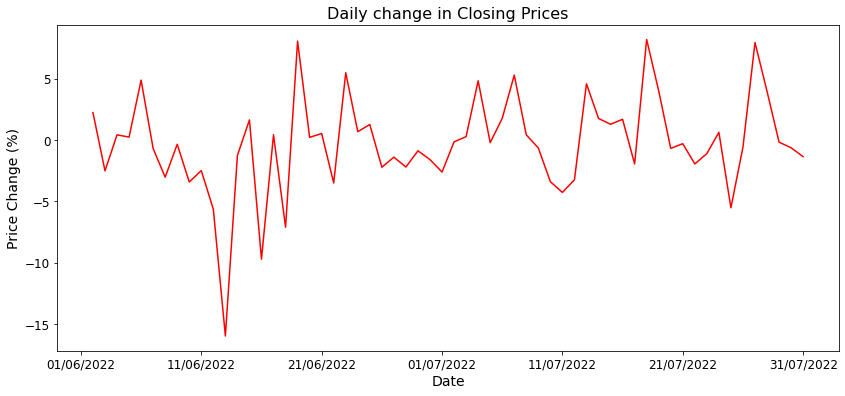

In [39]:
#plot the daily change in the closing prices using the newly created column in the Prices dataframe

Prices.plot(x = 'Date', y = 'DayChg(%)', kind = 'line', figsize = (14,6),legend=False, color = 'r', fontsize = 12)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price Change (%)', fontsize = 14)
plt.title('Daily change in Closing Prices', fontsize = 16)
plt.show()

# Drop duplicates

In [40]:
#already imported pandas above
#import a csv file with Bitcoin prices for June 2022 with 4 days duplicated
#the shape output shows 34 rows which should only be 30 (30 days in June)

import pandas as pd
df3 = pd.read_csv('Duplicates June BTC.csv')
df3.shape

(34, 7)

In [41]:
#find the duplicate rows in the dataframe
#view theh duplicate rows

duplicaterows = df3[df3.duplicated()]
print(duplicaterows)

          Date         High          Low        Open         Close  \
30  27/06/2022  21478.08984  20620.19922  21028.23828  20735.47852   
31  28/06/2022  21164.42383  20228.81250  20731.54492  20280.63477   
32  29/06/2022  20364.15625  19937.79102  20281.16992  20104.02344   
33  30/06/2022  20141.16016  18729.65625  20108.31250  19784.72656   

         Volume    Adj Close  
30  20965695707  20735.47852  
31  21381535161  20280.63477  
32  23552740328  20104.02344  
33  26267239923  19784.72656  


In [42]:
#drop the duplicate rows and keep the last duplicate
#see that index rows 26,27,28,29 were removed from the dataframe
#NaN values were populated above - see section: Filling the blanks (NaN values) with the mean of the Adj Close column

df3.drop_duplicates(keep='last')

,Date,High,Low,Open,Close,Volume,Adj Close
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211
5,06/06/2022,31693.29102,29894.18750,29910.28320,31370.67188,31947336829,31370.67188
6,07/06/2022,31489.68359,29311.68359,31371.74219,31155.47852,40770974039,31155.47852
7,08/06/2022,31253.69141,29944.40430,31151.48047,30214.35547,30242059107,30214.35547
8,09/06/2022,30609.31055,30020.26563,30215.27930,30111.99805,21692004719,NaN
9,10/06/2022,30245.80859,28978.14648,30110.33008,29083.80469,29867476527,29083.80469


# Importing client data from csv file used for machine learning

In [43]:
#import pandas and import a csv file with random client investment data
#check the shape of the data (rows and columns)

import pandas as pd
Client = pd.read_csv('RandomClientData.csv')
Client.shape

(12477, 8)

In [44]:
#See what the data looks like

Client.head(10)

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE
0,2012,"Bank of America Corp.%2f Bank of America,NA",MALE,18,DE,United States,Alternative,3443
1,2012,Chicago Carriage Cab Company,MALE,18,IL,United States,Alternative,94830
2,2012,Barrett & Porto,FEMALE,18,IL,United States,Alternative,31441
3,2014,Sutherland LLC,FEMALE,18,NJ,United States,Alternative,68607
4,2012,Museums in the Park,MALE,18,IL,United States,Alternative,19391
5,2017,VPC 740 Rush LLC,FEMALE,18,IL,United States,Alternative,56279
6,2017,"Siebert Cisneros Shank & Co., L.L.C.",FEMALE,18,IL,United States,Alternative,1269
7,2017,"Ispas, Luminita",MALE,18,IL,United States,Alternative,72546
8,2017,"Merrill Lynch, Pierce, Fenner & Smith, Inc.",MALE,18,NC,United States,Alternative,27696
9,2017,"Adekola, Michelle",MALE,18,IL,United States,Alternative,85510


In [45]:
#check for any missing data
Client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12477 entries, 0 to 12476
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FIRST_INV_DATE   12477 non-null  int64 
 1   NAME             12475 non-null  object
 2   GENDER           12477 non-null  object
 3   AGE              12477 non-null  int64 
 4   STATE            12470 non-null  object
 5   COUNTRY          12477 non-null  object
 6   INVESTMENT_TYPE  12477 non-null  object
 7   NET_ASSET_VALUE  12477 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 779.9+ KB


In [46]:
#there are 7 rows that are missing the State and 2 rows that are missing the name
#as we have 12477 rows of data, I will drop these rows rather than populate random data

null_data = Client[Client.isnull().any(axis=1)]
null_data

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE
2292,2011,Government Enhancement Services,FEMALE,34,NaN,United States,Cash,192303
3930,2011,Catherine Cook School,MALE,39,NaN,United States,ETF,263919
4763,2011,"dEvRY, iNC",FEMALE,41,NaN,United States,ETF,293274
9335,2011,Holsten,MALE,54,NaN,United States,Currency,715726
9373,2019,NaN,FEMALE,54,MN,United States,Equities,679656
9501,2018,NaN,FEMALE,55,IL,United States,Equities,682720
10345,2011,"Bruno, Al",FEMALE,57,NaN,United States,Equities,808254
10978,2012,55th & State LLC,FEMALE,59,NaN,United States,Equities,658256
11174,2011,"CGI Technologies & Solutions, Inc",MALE,60,NaN,United States,Equities,978059


In [47]:
#delete rows with NaN, None or Null values

Client = Client.dropna()
Client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 12476
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FIRST_INV_DATE   12468 non-null  int64 
 1   NAME             12468 non-null  object
 2   GENDER           12468 non-null  object
 3   AGE              12468 non-null  int64 
 4   STATE            12468 non-null  object
 5   COUNTRY          12468 non-null  object
 6   INVESTMENT_TYPE  12468 non-null  object
 7   NET_ASSET_VALUE  12468 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 876.7+ KB


In [48]:
#check the stats of the Client dataframe

Client.describe()

,FIRST_INV_DATE,AGE,NET_ASSET_VALUE
count,12468.000000,12468.000000,1.246800e+04
mean,2014.104668,46.094963,4.943743e+05
std,2.246650,12.595825,3.068845e+05
min,2011.000000,18.000000,3.580000e+02
25%,2012.000000,36.000000,2.672862e+05
50%,2014.000000,45.000000,4.800030e+05
75%,2016.000000,54.000000,6.713010e+05
max,2020.000000,96.000000,2.097928e+06


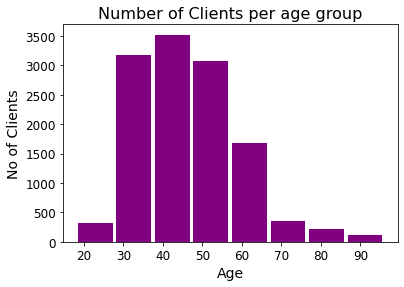

In [50]:
#plot a histogram of the age column to see the distribution of ages into 8 buckets(bins)

import matplotlib.pyplot as plt
import numpy as np

plt.hist(Client['AGE'], bins = 8, rwidth = .9,color = 'purple')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('No of Clients', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Number of Clients per age group', fontsize = 16)
plt.show()

# Using Regex 

In [51]:
#import re
#find words with 10 characters or more

import re
print(re.findall(r'\w{10,}',str(Client['NAME'])))

['Sutherland', 'Continental', 'Corporation', 'Electrical', 'Management']


In [52]:
#find words which start with 'Co'

print(re.findall(r'Co\w+',str(Client['NAME'])))

['Corp', 'Company', 'Continental', 'Corporation']


In [53]:
#print out the number of rows that contain words starting with 'Dev' (there are 536)

Devs = Client['NAME'].str.contains('Dev\w+').value_counts()
print(Devs)

False    11932
True       536
Name: NAME, dtype: int64


In [54]:
#Find all the rows where there seems to be an address in the Name column

Client[Client['NAME'].str.contains('\d{4}[-]\d{4}')]

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE
172,2017,1010-1058 West 35th Street (Chicago) LLC,MALE,23,IL,United States,Alternative,37647
468,2011,5202-5210 S. Cornell LLC,MALE,29,NJ,United States,Currency,53331
931,2013,1124-1128 Wrightwood LLC,FEMALE,30,IL,United States,Currency,184583
1627,2013,5100-5120 S. Ellis LLC,MALE,32,NJ,United States,Currency,10401
1889,2013,2040-2042 N Damen Ave LLC,FEMALE,33,IL,United States,Cash,316437
2133,2011,5335-5345 S. Kimbark LLC,MALE,34,NJ,United States,Currency,130833
2360,2019,1218-1220 N. Carman LLC,MALE,34,IL,United States,Currency,325551
3159,2017,5019-5021 N ASHLAND LLC C/O DREW BRENEMAN,FEMALE,36,IL,United States,Currency,142468
3203,2014,2040-2042 N Damen Ave LLC,MALE,37,IL,United States,Currency,324317
3882,2011,"5400-5408 S. Inglesdie, LLC",MALE,39,NJ,United States,ETF,496723


# Machine Learning

In [66]:
Client.shape

(12468, 9)

In [55]:
#convert the FEMALE and MALE to 0 and 1 respectively in the GENDER column of the Client dataframe

Client['GENDER'] = Client['GENDER'].replace(['FEMALE','MALE'],[0,1])
Client.head()

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE
0,2012,"Bank of America Corp.%2f Bank of America,NA",1,18,DE,United States,Alternative,3443
1,2012,Chicago Carriage Cab Company,1,18,IL,United States,Alternative,94830
2,2012,Barrett & Porto,0,18,IL,United States,Alternative,31441
3,2014,Sutherland LLC,0,18,NJ,United States,Alternative,68607
4,2012,Museums in the Park,1,18,IL,United States,Alternative,19391


0.878757879358804


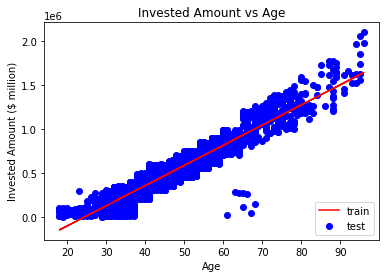

In [56]:
#import packages 
#predict the net asset value of the client based on the age of the client
#split the data, train the model on the train data and then score on the test data
#use a test size of 30% (this means 30% of the whole dataset will be used as a test set, 70% will be the training set)


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

X = Client['AGE'].values #independent variable array = YEARS_SINCE_INV
y = Client['NET_ASSET_VALUE'].values #dependent variable vector = NET_ASSET_VALUE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color='b')
plt.plot(X_test,y_pred, color='r')

plt.legend(loc='lower right', labels = ('train', 'test'))

plt.title('Invested Amount vs Age')

plt.xlabel('Age')
plt.ylabel('Invested Amount ($ million)')

plt.show()

In [65]:
X_train.shape

(9974, 2)

In [67]:
X_test.shape

(2494, 2)

In [70]:
#import packages from sklearn
#predict the investment type of the client based on gender, age and net asset value
#use a test size of 20% (20% of the whole dataset will be used as a test set, 80% will be the training set)
#get and accuracy score of 0.573

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = Client.drop(columns = ['FIRST_INV_DATE','NAME','STATE','COUNTRY','INVESTMENT_TYPE'],axis=1)
y = Client['INVESTMENT_TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

0.5817963111467522

In [71]:
print(predictions)

['Bonds' 'Currency' 'Bonds' ... 'Currency' 'Equities' 'ETF']


In [72]:
#use hyperparameter tuning to improve the accuracy score of the predictions
#accuracy increases to 0.625
#n_estimators (no of trees in the forest used were 100, 200 and 300)
#n_estimators of 100 was the best (best number of trees was 100)
#max_depth (the depth of allowing the tree to grow to)
#max_depth of 3 was the best

import pandas as pd
import numpy as np

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection


X = Client.drop(columns = ['FIRST_INV_DATE','NAME','STATE','COUNTRY','INVESTMENT_TYPE'],axis=1).values
y = Client['INVESTMENT_TYPE'].values

classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'criterion':['gini','entropy'],
}

model = model_selection.GridSearchCV(
    estimator=classifier,
    param_grid = param_grid,
    scoring='accuracy',
    verbose=10,
    n_jobs=1,
    cv=5,
)
model.fit(X,y)
print(model.best_score_)
print(model.best_estimator_.get_params())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 1/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.278 total time=   4.4s
[CV 2/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 2/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.771 total time=   0.3s
[CV 3/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 3/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.767 total time=   0.3s
[CV 4/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 4/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.856 total time=   0.3s
[CV 5/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 5/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.305 total time=   0.3s
[CV 1/5; 2/18] START criterion=gini, max_dep

[CV 1/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.360 total time=   0.3s
[CV 2/5; 10/18] START criterion=entropy, max_depth=3, n_estimators=100..........
[CV 2/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.770 total time=   0.3s
[CV 3/5; 10/18] START criterion=entropy, max_depth=3, n_estimators=100..........
[CV 3/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.767 total time=   0.3s
[CV 4/5; 10/18] START criterion=entropy, max_depth=3, n_estimators=100..........
[CV 4/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.859 total time=   0.3s
[CV 5/5; 10/18] START criterion=entropy, max_depth=3, n_estimators=100..........
[CV 5/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.345 total time=   0.3s
[CV 1/5; 11/18] START criterion=entropy, max_depth=3, n_estimators=200..........
[CV 1/5; 11/18] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.366 to

In [73]:
#use function created previously called DayVar
#use the DayVar function to calculate the years since the first investment up until the current year
#add the new column on the end of the dataframe Client

currentyear = 2022
yearssince = DayVar(Client['FIRST_INV_DATE'],currentyear)
Client['YEARS_SINCE_INV'] = yearssince

Client.head()

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE,YEARS_SINCE_INV
0,2012,"Bank of America Corp.%2f Bank of America,NA",1,18,DE,United States,Alternative,3443,10
1,2012,Chicago Carriage Cab Company,1,18,IL,United States,Alternative,94830,10
2,2012,Barrett & Porto,0,18,IL,United States,Alternative,31441,10
3,2014,Sutherland LLC,0,18,NJ,United States,Alternative,68607,8
4,2012,Museums in the Park,1,18,IL,United States,Alternative,19391,10


1.0


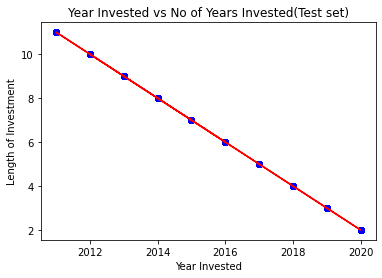

In [74]:
#using the new column in the dataframe
#check that the prediction accuracy is 1 
#as there is a direct correlation between the year invested and number of years since invested

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

X = Client['FIRST_INV_DATE'].values #independent variable array = YEARS_SINCE_INV
y = Client['YEARS_SINCE_INV'].values #dependent variable vector = NET_ASSET_VALUE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color='b')
plt.plot(X_test,y_pred, color='r')

plt.title('Year Invested vs No of Years Invested(Test set)')

plt.xlabel('Year Invested')
plt.ylabel('Length of Investment')

plt.show()

In [75]:
#use knn  which is a supervised machine learning algorithm
#find out what the investment type is based on the age of the client and years since the client invested


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


knn = KNeighborsClassifier(n_neighbors=8)

X = Client[['AGE','YEARS_SINCE_INV']].values
y = Client['INVESTMENT_TYPE'].values
print(X.shape, y.shape)

knn.fit(X, y)


(12468, 2) (12468,)


KNeighborsClassifier(n_neighbors=8)

In [76]:
#the training data is used to fit the model - it will be used as the neighbours
#the test data will be used to predict the investment_type of the clients. This will be compared to the known investment types
#fit the knn regression model to make predictions

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify = y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7361668003207699


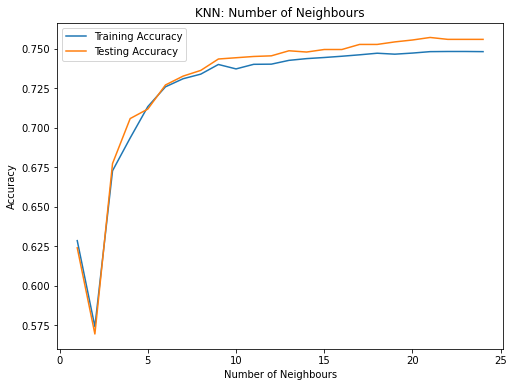

In [77]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,25)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors= neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
plt.figure(figsize=(8,6))
plt.title('KNN: Number of Neighbours')
plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')

plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')

plt.show()

In [87]:
knn_acc = []

for i in range(1,40,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train) 
                            
    knn_acc.append((i,test_score, train_score))
                            
knn_df = pd.DataFrame(knn_acc, columns = ['K', 'Test Score','Train Score'])
print(knn_df)

     K  Test Score  Train Score
0    1    0.623897     0.628434
1    2    0.569366     0.573992
2    3    0.677225     0.672649
3    4    0.705694     0.693403
4    5    0.711708     0.713254
5    6    0.726945     0.725787
6    7    0.732558     0.730900
7    8    0.736167     0.733808
8    9    0.743384     0.739924
9   10    0.744186     0.737117
10  11    0.744988     0.740024
11  12    0.745389     0.740124
12  13    0.748597     0.742531
13  14    0.747795     0.743633
14  15    0.749399     0.744335
15  16    0.749399     0.745137
16  17    0.752606     0.746040
17  18    0.752606     0.747042
18  19    0.754210     0.746441
19  20    0.755413     0.747143
20  21    0.757017     0.748045
21  22    0.755814     0.748145
22  23    0.755814     0.748145
23  24    0.755814     0.748045
24  25    0.755814     0.748045
25  26    0.755012     0.747644
26  27    0.755413     0.747544
27  28    0.755413     0.747544
28  29    0.755413     0.747544
29  30    0.755012     0.746441
30  31  

In [88]:
#try and find the best value for k

from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1,40)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)})

In [89]:
#show the best performing value of k

gridsearch.best_params_

{'n_neighbors': 20}

In [98]:
#the best performing value of k is at location 20 which means that it is n = 21

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7570168404170008


In [99]:
#find the various error rates for various n neighbours
#store these error rates in an array for 1 to 40 neighbours

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.2429831595829992 at K = 21


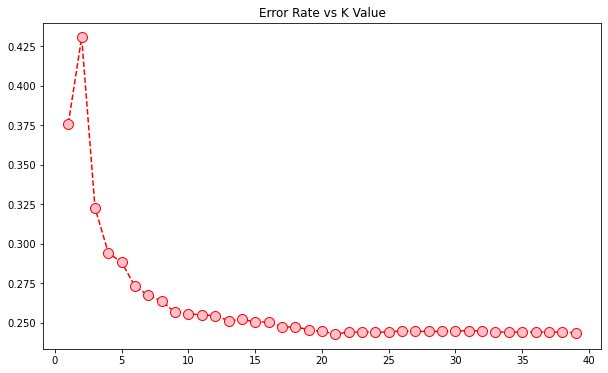

In [100]:
#plot these error rates against the neighbour values to see which n neighbour got the lowest error rate 
#the results of this show the results of K above correspond
#for the best accuracy we should use n=21 for the KNN classifier

plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'red',
        linestyle='dashed',marker='o', markerfacecolor = 'pink', markersize = 10)
plt.title('Error Rate vs K Value')
reg_k_value = error_rate.index(min(error_rate))+1
print('Minimum error:-',min(error_rate),'at K =',reg_k_value)


In [102]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=reg_k_value, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 
y_pred= classifier.predict(X_test)

KNN - 21 neighbors Accuracy score and Confusion matrix
0.7570168404170008


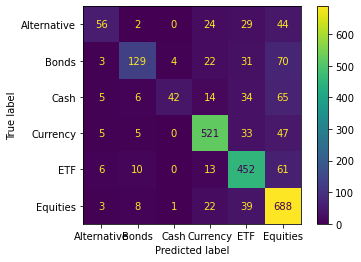

In [112]:
#plot the confusion_matrix to view more information about the model's performance

from sklearn.metrics import plot_confusion_matrix

print("KNN - 21 neighbors Accuracy score and Confusion matrix")
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()


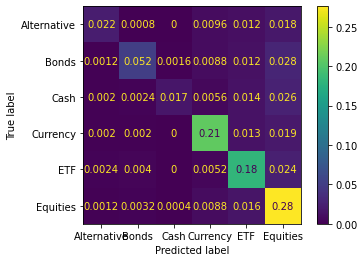

In [126]:
#normalise the confusion matrix heatmap

plot_confusion_matrix(classifier, X_test, y_test, normalize = 'all')
plt.show()

In [128]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

 Alternative       0.08      0.09      0.09       155
       Bonds       0.11      0.11      0.11       259
        Cash       0.08      0.08      0.08       166
    Currency       0.26      0.24      0.25       611
         ETF       0.25      0.25      0.25       542
    Equities       0.32      0.33      0.32       761

    accuracy                           0.24      2494
   macro avg       0.18      0.18      0.18      2494
weighted avg       0.24      0.24      0.24      2494

